# **Assignment 2 - Spartial Filters** #

D/ENG/21/0108/EE - MWM Shakir


Question 1

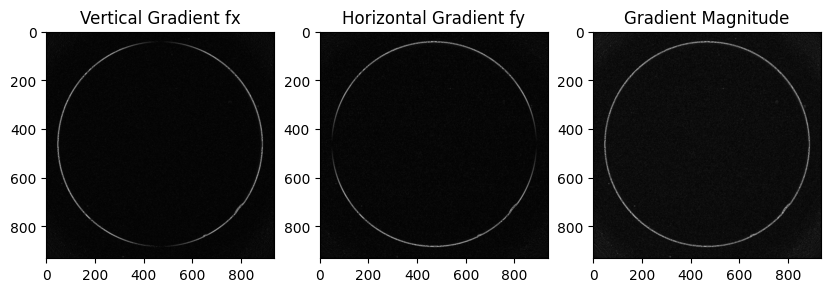

Center Coordinates : ( 467 , 463 )


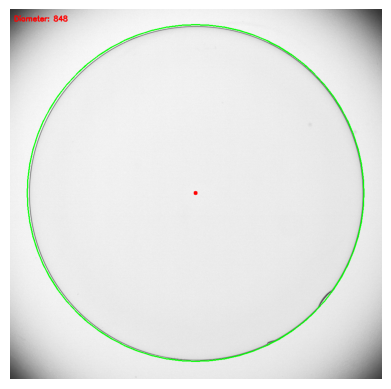

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('images/contact_lens.tif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# vertical gradient fx using the Sobel kernel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
# horizontal gradient fy using the Sobel kernel
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
# Compute the gradient magnitude |fx|+|fy|
mag = cv.addWeighted(np.absolute(sobelx), 1, np.absolute(sobely), 1, 0)
# Plot
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(np.absolute(sobelx).astype('uint8'), cmap='gray')
axs[0].set_title("Vertical Gradient fx")
axs[1].imshow(np.absolute(sobely).astype('uint8'), cmap='gray')
axs[1].set_title("Horizontal Gradient fy")
axs[2].imshow(mag.astype('uint8'), cmap='gray')
axs[2].set_title("Gradient Magnitude")
plt.show()

# Applying Gaussian blur to reduce noise 
blur = cv.GaussianBlur(gray, (5, 5), 0)
# Applying Canny edge detection to detect the edges of the circular object
edges = cv.Canny(blur, 50, 150)
# Finding the coordinates of the non-zero pixels in the edge image
y_coords, x_coords = np.where(edges != 0)
# Finding the center of the circular object as the mean of the pixel coordinates
cX = int(np.mean(x_coords))
cY = int(np.mean(y_coords))
print("Center Coordinates :", "(",cX, "," ,cY,")")
# Calculating the distances of each edge pixel to the center
distances = np.sqrt((x_coords - cX)**2 + (y_coords - cY)**2)
# calculating the diameter of the circular object as twice the maximum distance
diameter = int(2 * np.max(distances))
# Drawing the center and diameter on the original image
cv.circle(img, (cX, cY), 5, (0, 0, 255), -1)
cv.circle(img, (cX, cY), diameter // 2, (0, 255, 0), 2)
cv.putText(img, f"Diameter: {diameter}", (10, 30), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
#Result
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Question 2

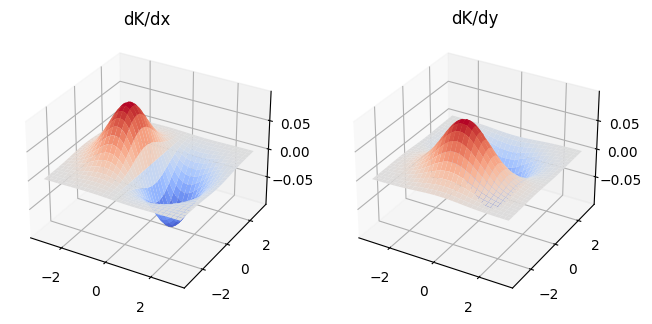

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#defining the variable regions
x, y = np.meshgrid(np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1))
z = np.zeros_like(x)
sigma = 1
#3D gaussian kernel
K = 1.0 / (2.0 * np.pi * sigma**2) * np.exp(-(x**2 + y**2 + z**2) / (2.0 * sigma**2))

#derivatives of 3D gaussian kernel
dK_dx = (-x / sigma**2) * K
dK_dy = (-y / sigma**2) * K

# plot the kernels
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title("dK/dx")
ax1.plot_surface(x, y, dK_dx, cmap='coolwarm')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title("dK/dy")
ax2.plot_surface(x, y, dK_dy, cmap='coolwarm')

plt.show()


**Question 3**

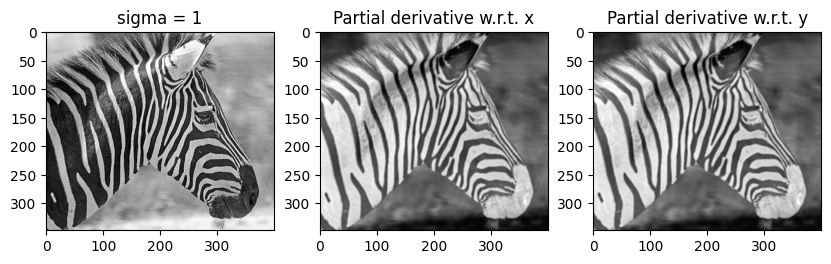

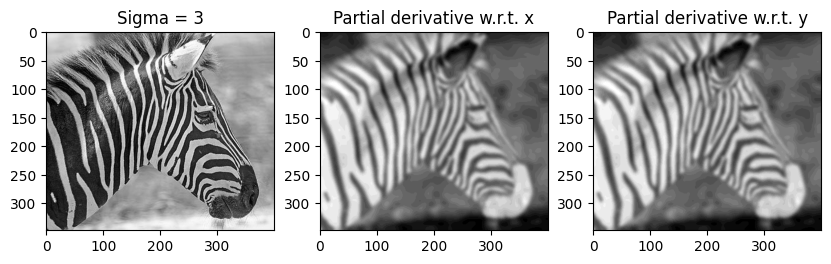

In [7]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

img = cv.imread('images/zebrahead.jpg', cv.IMREAD_GRAYSCALE)

sigma = 1
#Gaussian kernel and its derivatives
kernel = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        kernel[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
dKdx = ndimage.convolve(img, -kernel/sigma**2)
dKdy = ndimage.convolve(img, -kernel.T/sigma**2)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('sigma = 1')
axs[1].imshow(dKdx, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(dKdy, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()

sigma = 3

#Gaussian kernel and its derivatives
kernel = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        kernel[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
dKdx = ndimage.convolve(img, -kernel/sigma**2)
dKdy = ndimage.convolve(img, -kernel.T/sigma**2)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Sigma = 3')
axs[1].imshow(dKdx, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(dKdy, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()


**Question 4**

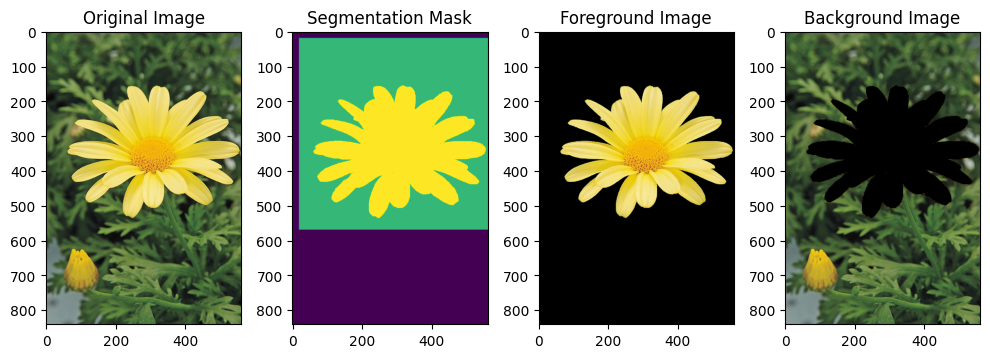

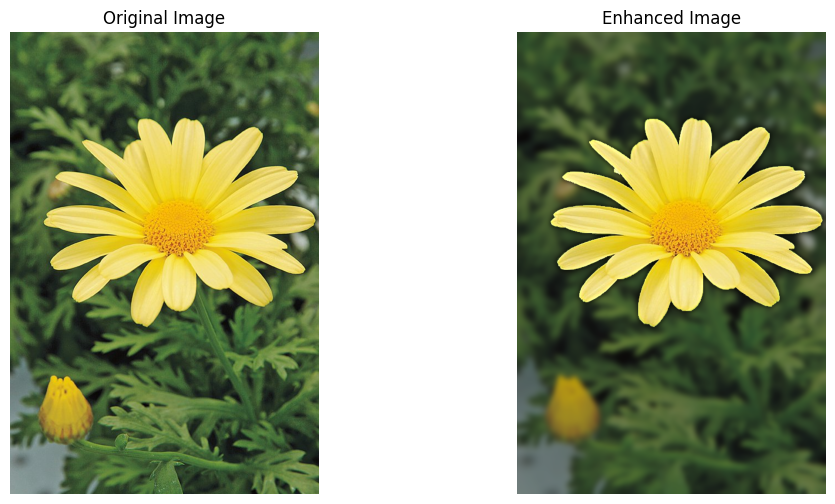

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('images/daisy.jpg')

# Creating a mask with same dimensions as image, and setting everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
# Defining the rectangle enclosing the flower
rect = (20, 20, 550, 550)
# Runing the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
# Creating a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
# Applying the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

# Showing the final segmentation mask, foreground image, and background image
plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(img[:,:,::-1]), plt.title('Original Image')
plt.subplot(142), plt.imshow(mask), plt.title('Segmentation Mask')
plt.subplot(143), plt.imshow(foreground[:,:,::-1]), plt.title('Foreground Image')
plt.subplot(144), plt.imshow(background[:,:,::-1]), plt.title('Background Image')
plt.tight_layout()
plt.show()

# Apply Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)
# Combining the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Displaying the original image and the enhanced image side by side
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


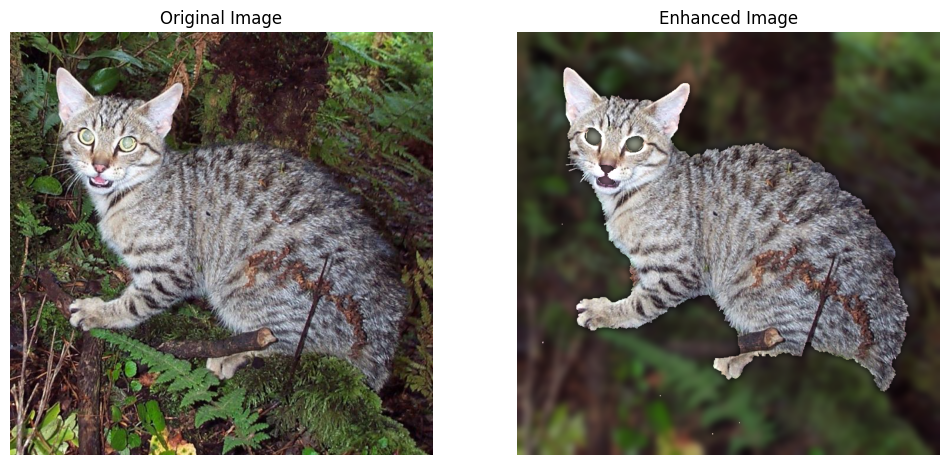

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('images/cat.jpg')

mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
rect = (20, 20, 700, 700)
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)
blurred_bg = cv.GaussianBlur(background, (41, 41), 0)
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')
plt.axis('off')

plt.show()